# Data Exploration

# Testing

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-08-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-08-01
2020-08-02
2020-08-03
2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11
2020-08-12
2020-08-13
2020-08-14
2020-08-15
2020-08-16
2020-08-17
2020-08-18
2020-08-19
2020-08-20
2020-08-21
2020-08-22
2020-08-23
2020-08-24
2020-08-25
2020-08-26
2020-08-27
2020-08-28
2020-08-29
2020-08-30
2020-08-31
2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
	does not exist jet


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-01T00:01:36,3.93,NaN,NaN,2.00,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-01T00:04:07,4.67,NaN,NaN,2.10,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-01T00:06:39,2.83,NaN,NaN,1.80,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-01T00:09:14,7.00,NaN,NaN,1.90,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-01T00:11:49,3.63,NaN,NaN,1.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
582,6842,SDS011,3460,52.028,8.916,2020-09-06T23:48:42,9.40,NaN,NaN,2.60,NaN,NaN
583,6842,SDS011,3460,52.028,8.916,2020-09-06T23:51:10,4.27,NaN,NaN,2.47,NaN,NaN
584,6842,SDS011,3460,52.028,8.916,2020-09-06T23:53:36,3.60,NaN,NaN,2.97,NaN,NaN
585,6842,SDS011,3460,52.028,8.916,2020-09-06T23:56:02,5.93,NaN,NaN,2.70,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,20567.0,20567.0,2.056700e+04,2.056700e+04,20567.000000,0.0,0.0,20567.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.098226,NaN,NaN,4.691615,NaN,NaN
std,0.0,0.0,7.105600e-15,1.776400e-15,6.696753,NaN,NaN,5.370389,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.400000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,3.530000,NaN,NaN,1.600000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,5.700000,NaN,NaN,2.780000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,8.850000,NaN,NaN,6.350000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-01 00:01:36,6842,SDS011,3460,52.028,8.916,3.93,NaN,NaN,2.00,NaN,NaN
2020-08-01 00:04:07,6842,SDS011,3460,52.028,8.916,4.67,NaN,NaN,2.10,NaN,NaN
2020-08-01 00:06:39,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.80,NaN,NaN
2020-08-01 00:09:14,6842,SDS011,3460,52.028,8.916,7.00,NaN,NaN,1.90,NaN,NaN
2020-08-01 00:11:49,6842,SDS011,3460,52.028,8.916,3.63,NaN,NaN,1.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-06 23:48:42,6842,SDS011,3460,52.028,8.916,9.40,NaN,NaN,2.60,NaN,NaN
2020-09-06 23:51:10,6842,SDS011,3460,52.028,8.916,4.27,NaN,NaN,2.47,NaN,NaN
2020-09-06 23:53:36,6842,SDS011,3460,52.028,8.916,3.60,NaN,NaN,2.97,NaN,NaN


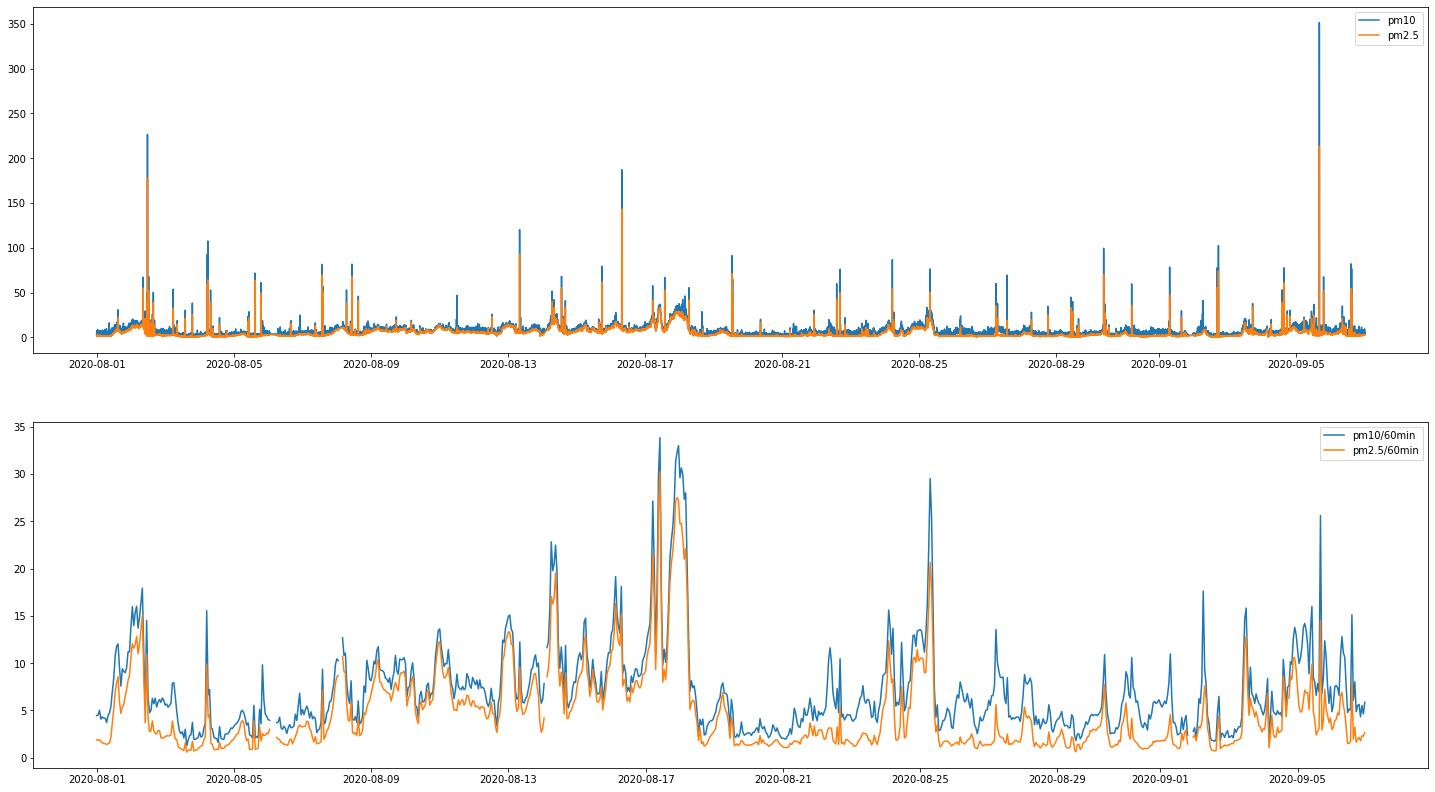

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList)

29366
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
10410
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
19004
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
30685
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
22543
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
3859
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
22725
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
1691
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
25343
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
48689
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
539
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
1180
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
5221
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
10029
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
26277
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
16954
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
8474
2020-09-05
2020-09-06
2020-09-07
	does not exist jet
1226

In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-06 23:40:05,4857,SDS011,2443,51.978,8.472,7.07,NaN,NaN,4.43,NaN,NaN
2020-09-06 23:45:01,4857,SDS011,2443,51.978,8.472,8.02,NaN,NaN,3.10,NaN,NaN
2020-09-06 23:49:57,4857,SDS011,2443,51.978,8.472,6.75,NaN,NaN,2.75,NaN,NaN


## API Call

In [12]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
df = pd.DataFrame(rdata)

In [13]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
0,1789603272,NaN,2020-09-07 23:48:01,"{'id': 29774, 'latitude': '52.664', 'longitude...","{'id': 44110, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3860471678, 'value': '5.75', 'value_ty..."
1,1789603271,NaN,2020-09-07 23:48:01,"{'id': 27638, 'latitude': '42.184', 'longitude...","{'id': 41947, 'pin': '11', 'sensor_type': {'id...","[{'id': 3860471675, 'value': '23.37', 'value_t..."
2,1789603270,NaN,2020-09-07 23:48:01,"{'id': 11751, 'latitude': '42.7', 'longitude':...","{'id': 23165, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3860471673, 'value': '7.87', 'value_ty..."
3,1789603269,NaN,2020-09-07 23:48:01,"{'id': 28208, 'latitude': '53.37155643155', 'l...","{'id': 42571, 'pin': '11', 'sensor_type': {'id...","[{'id': 3860471670, 'value': '17.18', 'value_t..."
4,1789603268,NaN,2020-09-07 23:48:01,"{'id': 21818, 'latitude': '51.078', 'longitude...","{'id': 35699, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3860471668, 'value': '3.97', 'value_ty..."
...,...,...,...,...,...,...
45787,1789557244,NaN,2020-09-07 23:42:52,"{'id': 26745, 'latitude': '52.05033540000', 'l...","{'id': 41004, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860372017, 'value': '16.90', 'value_t..."
45788,1789557243,NaN,2020-09-07 23:42:52,"{'id': 3957, 'latitude': '48.62', 'longitude':...","{'id': 7824, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3860372015, 'value': '9.90', 'value_ty..."
45789,1789557242,NaN,2020-09-07 23:42:52,"{'id': 9454, 'latitude': '53.516', 'longitude'...","{'id': 18649, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3860372013, 'value': '3.58', 'value_ty..."
45790,1789557241,NaN,2020-09-07 23:42:52,"{'id': 8517, 'latitude': '53.546', 'longitude'...","{'id': 11221, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860372011, 'value': '16.70', 'value_t..."


In [14]:
df.location[0]

{'id': 29774,
 'latitude': '52.664',
 'longitude': '5.074',
 'altitude': '1.4',
 'country': 'NL',
 'exact_location': 0,
 'indoor': 0}

In [15]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [16]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
4,1789603268,NaN,2020-09-07 23:48:01,"{'id': 21818, 'latitude': '51.078', 'longitude...","{'id': 35699, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3860471668, 'value': '3.97', 'value_ty..."
5,1789603267,NaN,2020-09-07 23:48:01,"{'id': 4898, 'latitude': '49.298', 'longitude'...","{'id': 9718, 'pin': '1', 'sensor_type': {'id':...","[{'id': 3860471666, 'value': '4.25', 'value_ty..."
6,1789603266,NaN,2020-09-07 23:48:01,"{'id': 21608, 'latitude': '49.3', 'longitude':...","{'id': 35495, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860471664, 'value': '23.10', 'value_t..."
10,1789603261,NaN,2020-09-07 23:48:01,"{'id': 19271, 'latitude': '51.908', 'longitude...","{'id': 32306, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860471651, 'value': '24.40', 'value_t..."
11,1789603260,NaN,2020-09-07 23:48:01,"{'id': 15674, 'latitude': '51.52267909932', 'l...","{'id': 28446, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860471650, 'value': '15.60', 'value_t..."
...,...,...,...,...,...,...
45787,1789557244,NaN,2020-09-07 23:42:52,"{'id': 26745, 'latitude': '52.05033540000', 'l...","{'id': 41004, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860372017, 'value': '16.90', 'value_t..."
45788,1789557243,NaN,2020-09-07 23:42:52,"{'id': 3957, 'latitude': '48.62', 'longitude':...","{'id': 7824, 'pin': '7', 'sensor_type': {'id':...","[{'id': 3860372015, 'value': '9.90', 'value_ty..."
45789,1789557242,NaN,2020-09-07 23:42:52,"{'id': 9454, 'latitude': '53.516', 'longitude'...","{'id': 18649, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3860372013, 'value': '3.58', 'value_ty..."
45790,1789557241,NaN,2020-09-07 23:42:52,"{'id': 8517, 'latitude': '53.546', 'longitude'...","{'id': 11221, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3860372011, 'value': '16.70', 'value_t..."


In [17]:
df.location

4        {'id': 21818, 'latitude': '51.078', 'longitude...
5        {'id': 4898, 'latitude': '49.298', 'longitude'...
6        {'id': 21608, 'latitude': '49.3', 'longitude':...
10       {'id': 19271, 'latitude': '51.908', 'longitude...
11       {'id': 15674, 'latitude': '51.52267909932', 'l...
                               ...                        
45787    {'id': 26745, 'latitude': '52.05033540000', 'l...
45788    {'id': 3957, 'latitude': '48.62', 'longitude':...
45789    {'id': 9454, 'latitude': '53.516', 'longitude'...
45790    {'id': 8517, 'latitude': '53.546', 'longitude'...
45791    {'id': 13034, 'latitude': '48.406', 'longitude...
Name: location, Length: 22297, dtype: object

In [18]:
# longitudes
northPoint = 8.6176
southPoint = 8.6988832

# latitudes
westPoint = 52.0406
eastPoint = 51.6435922

In [32]:
blabla = df['location'].apply(lambda x: x.get('longitude') if float(x.get('longitude')) <= northPoint and float(x.get('longitude')) >= southPoint else "FUCK")

In [33]:
blabla = blabla.to_frame()

In [34]:
blabla[blabla.location != "FUCK"]

,location
